In [62]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

In [64]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [65]:
y_train.shape

(50000, 1)

In [50]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [51]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [54]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [62]:
classes[4]

'deer'

In [73]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y_train[index]])

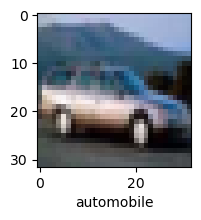

In [76]:
plot_sample(X_train,y_train,4)

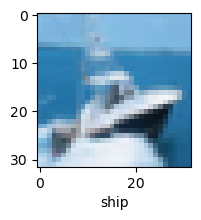

In [77]:
plot_sample(X_train,y_train,8)

In [66]:
X_train[0]/255
X_test=X_test/255

In [67]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 78s 49ms/step - loss: nan - accuracy: 0.0998
Epoch 2/5
1563/1563 [==============================] - 82s 52ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 85s 54ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 107s 69ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 73s 47ms/step - loss: nan - accuracy: 0.1000


In [68]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [69]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\Bhavya Nagrath\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Nagrath\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Nagrath\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [70]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 

In [71]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 2.0666 - accuracy: 0.3330
Epoch 2/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.3232 - accuracy: 0.5280
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1707 - accuracy: 0.5879
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0641 - accuracy: 0.6283
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9885 - accuracy: 0.6548
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9266 - accuracy: 0.6775
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8801 - accuracy: 0.6957
Epoch 8/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8354 - accuracy: 0.7122
Epoch 9/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7877 - accuracy: 0.7271
Epoch 10/10
1563/1563 [==============================] - 79s 51

In [73]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.5791 - accuracy: 0.1402


[2.579054355621338, 0.14020000398159027]